In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cityblock, pdist
import itertools

In [77]:
# file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n')
# np row major
raw_sky = np.array([list(line) for line in lines])
sky = np.insert(raw_sky, np.where(np.all(raw_sky == '.', axis=1))[0], np.full((1,raw_sky.shape[1]),'.'), axis=0)
sky = np.insert(sky, np.where(np.all(sky == '.', axis=0))[0], np.full((sky.shape[0],1),'.'), axis=1)
height, width = sky.shape[0], sky.shape[1]
# find # in sky
galaxies = np.argwhere(sky == '#') 
distances = pdist(galaxies, metric='cityblock')
int(np.sum(distances))
# answer is 9214785

9214785

In [78]:
# print("0123456789012")
# for row in range(sky.shape[0]):
#     for col in range(sky.shape[1]):
#         print(sky[row,col],end='')
#     print()

# print()
# print("0123456789012")
# print("....#........" == (''.join(sky[0,:].tolist())))
# print(".........#..." == (''.join(sky[1,:].tolist())))
# print("#............" == (''.join(sky[2,:].tolist())))
# print("............." == (''.join(sky[3,:].tolist())))
# print("............." == (''.join(sky[4,:].tolist())))
# print("........#...." == (''.join(sky[5,:].tolist())))
# print(".#..........." == (''.join(sky[6,:].tolist())))
# print("............#" == (''.join(sky[7,:].tolist())))
# print("............." == (''.join(sky[8,:].tolist())))
# print("............." == (''.join(sky[9,:].tolist())))
# print(".........#..." == (''.join(sky[10,:].tolist())))
# print("#....#......." == (''.join(sky[11,:].tolist())))


In [80]:
G = nx.Graph()
galaxy_nodes = tuple(tuple(x) for x in galaxies.tolist())
for node_coords in galaxy_nodes:
    u, v = node_coords
    x, y = v, height-u
    G.add_node(node_coords, pos=(x, y))

# add edges with weight of manhattan distance
for i in range(len(galaxies)):
    for j in range(i+1,len(galaxies)):
        G.add_edge(galaxy_nodes[i], galaxy_nodes[j], weight=distances[i+j])


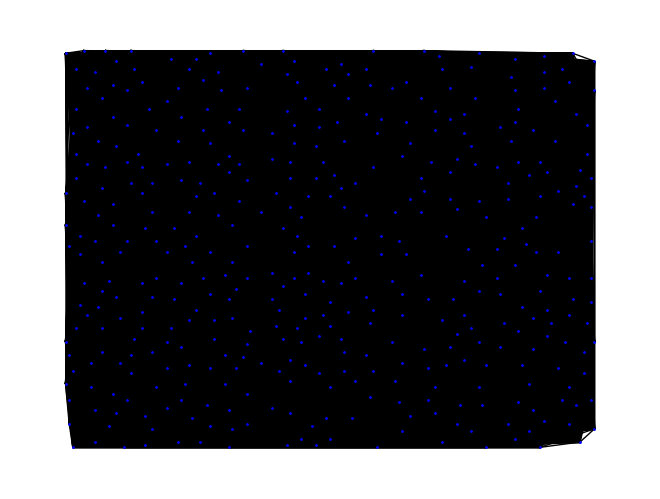

<Figure size 29400x30200 with 0 Axes>

In [82]:
# draw graph with labels on weighted edges
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

nx.draw(G, pos, node_color='blue', node_size=1, with_labels=False)
figsize = (sky.shape[1], sky.shape[0])
plt.figure(figsize=figsize)
plt.show()